<a href="https://colab.research.google.com/github/Hoa20146128/Fuzzy_CLD/blob/main/CLD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 19.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=6edd1a180af3a5044dabd478b06964f9c714963f68293aabab728e72bc17c83a
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


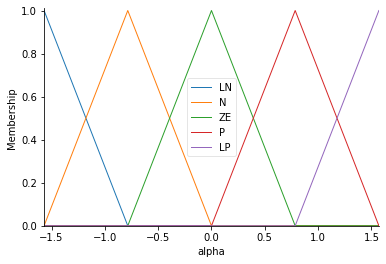

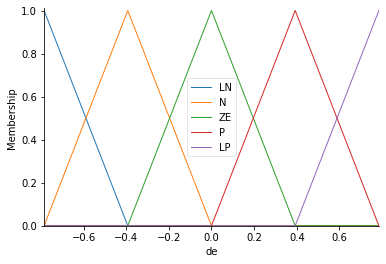

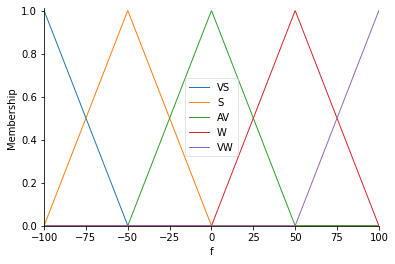

In [18]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import math

a = np.linspace(-3.14/2,3.14/2,61) 
da = np.linspace(-3.14/4,3.14/4,61)
F = np.linspace(-100,100,1000)

a = ctrl.Antecedent(a,'alpha')
da = ctrl.Antecedent(da,'de')
F = ctrl.Consequent(F,'f')

names = ['LN','N','ZE','P','LP']
nameF = ['VS','S','AV','W','VW']
a.automf(names = names) #automf chỉ có số lẻ 3,5,7,9,..
da.automf(names = names)
F.automf(names = nameF)
a.view()
da.view()
F.view()

In [19]:
rule = []

rule.append(ctrl.Rule(antecedent=((a['LN'] & da['LN'])|(a['LN'] & da['N'])|(a['LN'] & da['ZE'])|
                                  (a['N'] & da['LN'])),consequent=F['VS'],label='rule VS'))
rule.append(ctrl.Rule(antecedent=((a['ZE'] & da['LN'])|(a['ZE'] & da['N'])|(a['N'] & da['N'])|
                                  (a['N'] & da['ZE'])|(a['LN'] & da['P'])|(a['LN'] & da['LP'])),consequent=F['S'],label='rule S'))
rule.append(ctrl.Rule(antecedent=((a['ZE'] & da['ZE'])|(a['P'] & da['LN'])|(a['P'] & da['N'])|
                                  (a['N'] & da['P'])|(a['N'] & da['LP'])),consequent=F['AV'],label='rule AV'))
rule.append(ctrl.Rule(antecedent=((a['LP'] & da['LN'])|(a['LP'] & da['N'])|(a['P'] & da['ZE'])|
                                  (a['P'] & da['P'])|(a['ZE'] & da['P'])|(a['ZE'] & da['LP'])),consequent=F['W'],label='rule W'))
rule.append(ctrl.Rule(antecedent=((a['LP'] & da['ZE'])|(a['LP'] & da['P'])|(a['LP'] & da['LP'])|(a['P'] & da['LP'])),consequent=F['VW'],label='rule VW'))

55.958553236031236


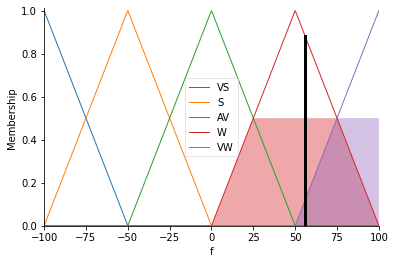

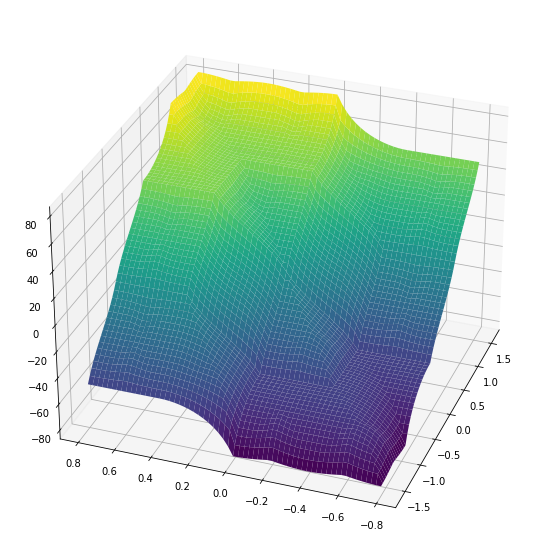

In [21]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#Control system
F_ctrl = ctrl.ControlSystem(rule)
Force_sim=ctrl.ControlSystemSimulation(F_ctrl)

Force_sim.input['alpha'] = np.pi/8
Force_sim.input['de'] = 1
Force_sim.compute()
print(Force_sim.output['f'])
F.view(sim = Force_sim)
# vẽ 3d 
d_ctrl = ctrl.ControlSystem(rule)
d_simulation=ctrl.ControlSystemSimulation(d_ctrl)
upsampled1=np.linspace(-np.pi/2,np.pi/2,61)
upsampled2=np.linspace(-np.pi/4,np.pi/4,61)
x,y = np.meshgrid(upsampled1,upsampled2)
z = np.zeros_like(x)

for i in range(61):
  for j in range(61):
    d_simulation.input['alpha']=x[i,j]
    d_simulation.input['de']=y[i,j]
    d_simulation.compute()
    z[i,j]=d_simulation.output['f']

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection = '3d')
suf = ax.plot_surface(x,y,z,rstride=1,cstride=1,cmap='viridis',linewidth=0.4,antialiased=True)
ax.view_init(30,200)